In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy
from scipy import stats

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,1):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1],bins=10, alpha=0.5, label='E0='+str(i-31))
#plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('E_amhgo (Kcal/mol)', fontsize=16)
plt.ylabel('Frequence', fontsize=16)
#plt.savefig("hist.png")

In [ ]:
plt.figure(figsize=(16,8))
for i in range(33,36):
    at=np.loadtxt(str(i)+"-8-wham-2d.dat")
    a=np.transpose(at)
    plt.hist(a[-1],bins=10, alpha=0.5)

In [ ]:
a=pd.read_csv('pmf-1.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['r', 'pmf', 'e1','prob', 'e2']
plt.figure(figsize=(6.4,5))
plt.errorbar(a.r, a.pmf, yerr=a.e1)
plt.xlabel('E_amhgo (Kcal/mol)', fontsize=16)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-30,0)
plt.ylim(0,10)
#plt.savefig('pmf-corrected-6-bin100.png')

In [ ]:
a=pd.read_csv('pmf-2.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['r', 'pmf', 'e1','prob', 'e2']
plt.figure(figsize=(6.4,5))
plt.errorbar(a.r, a.pmf, yerr=a.e1)
plt.xlabel('E_amhgo (Kcal/mol)', fontsize=16)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-30,0)
plt.ylim(0,10)
plt.savefig('pmf.png')

In [ ]:
a=pd.read_csv('pmf-3.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['r', 'pmf', 'e1','prob', 'e2']
plt.figure(figsize=(6.4,5))
plt.errorbar(a.r, a.pmf, yerr=a.e1)
plt.xlabel('E_amhgo (Kcal/mol)', fontsize=16)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-30,0)
plt.ylim(0,10)
#plt.savefig('pmf-corrected-6-bin100.png')

In [2]:
from sklearn.decomposition import PCA
from scipy.spatial import distance as sdist
import mdtraj as md
import seaborn as sns
import prody

In [4]:
components = np.loadtxt("../../../RRMs/free/free/new_cartesin_components.dat")
mean = np.loadtxt("../../../RRMs/free/free/new_cartesin_mean_coords.dat")
ref = md.load("../../../RRMs/free/free/1/freeRRMs-openmmawsem.pdb")
n = np.loadtxt("../../../RRMs/free/free/nail.index")
nail = [a.index for a in ref.topology.atoms if a.name == 'CA' and a.residue.index in n]

In [5]:
for f in range(0,33):
    traj = md.load('%i/movie.pdb'%f)
    traj_nail = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index-5 in n]
    traj_aligned = traj.superpose(ref, atom_indices=traj_nail, ref_atom_indices=nail, parallel=False)
    CA = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index-5 < 200]
    coords = traj_aligned.restrict_atoms(CA).xyz.reshape(traj_aligned.n_frames, len(CA) * 3)

    centered_coords = coords - mean
    proj = np.dot(components[0], centered_coords.T)
    np.savetxt("%i-wham-pc0.dat"%f, proj)

In [6]:
for f in range(33,36):
    for f1 in range(9):
        traj = md.load('%i-%i/movie.pdb' %(f, f1))
        traj_nail = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index-5 in n]
        traj_aligned = traj.superpose(ref, atom_indices=traj_nail, ref_atom_indices=nail, parallel=False)
        CA = [a.index for a in traj.topology.atoms if a.name == 'CA' and a.residue.index-5 < 200]
        coords = traj_aligned.restrict_atoms(CA).xyz.reshape(traj_aligned.n_frames, len(CA) * 3)

        centered_coords = coords - mean
        proj = np.dot(components[0], centered_coords.T)
        np.savetxt("%i-%i-wham-pc0.dat"%(f, f1), proj)

In [ ]:
plt.figure(figsize=(16,8))
for i in range(1,121):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1],bins=10, alpha=0.5)

In [ ]:
at=np.loadtxt("42-wham.dat")
a=np.transpose(at)
plt.hist(a[-1],bins=20, alpha=0.5)

In [ ]:
for f in range(26,27):
    proj=np.loadtxt("%i-wham-pc0.dat"%f)
    plt.plot(proj)

In [ ]:
a=pd.read_csv('2dpmf-1.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

#b.pmf[b.pmf>9999] = np.max(a.pmf) + 1
#levels=np.arange(0.0, np.max(a.pmf) + 0.4, 0.4)
#b.pmf[b.pmf>9999] = 20
#b.pmf[b.pmf>20] = 20
#levels=np.arange(-2, 20, 0.5)
levels=np.arange(0, 12, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf+2*0.001987*300*np.log(b.alpha))
CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.alpha)-minp, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.xlabel("E", fontsize=24)
plt.ylabel("R (nm)", fontsize=24)


In [ ]:
a=pd.read_csv('2dpmf-2.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

#b.pmf[b.pmf>9999] = np.max(a.pmf) + 1
#levels=np.arange(0.0, np.max(a.pmf) + 0.4, 0.4)
#b.pmf[b.pmf>9999] = 20
#b.pmf[b.pmf>20] = 20
#levels=np.arange(-2, 20, 0.5)
levels=np.arange(0, 15, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf+2*0.001987*300*np.log(b.alpha))
CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.alpha)-minp, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.xlabel("E", fontsize=24)
plt.ylabel("R (nm)", fontsize=24)

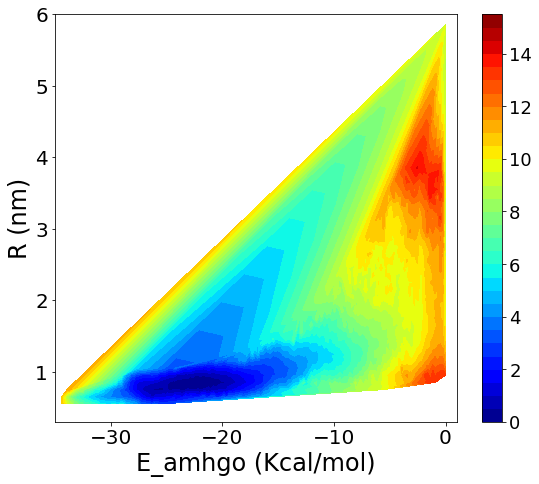

In [7]:
a=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

#b.pmf[b.pmf>9999] = np.max(a.pmf) + 1
#levels=np.arange(0.0, np.max(a.pmf) + 0.4, 0.4)
#b.pmf[b.pmf>9999] = 20
#b.pmf[b.pmf>20] = 20
#levels=np.arange(-2, 20, 0.5)
levels=np.arange(0, 16, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf+2*0.001987*300*np.log(b.alpha))
CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.alpha)-minp, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-35,1)
plt.ylim(0.3,6)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("R (nm)", fontsize=24)
plt.savefig("2dpmf.png")

In [ ]:
tmp=[]
plt.figure(figsize=(16,8))

for i in range(0,32):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
   # plt.hist(a[-1]-(1.1+0.05*i),bins=10, alpha=0.5)
    tmp.append((np.dot(a[-1]-(i-31),a[-1]-(i-31))/len(a[-1]))**0.5)
    
plt.plot(tmp)

In [ ]:
tmp=[]
plt.figure(figsize=(16,8))
for i in range(20,29):
    at=np.loadtxt(str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1]-(i-31),bins=10, alpha=0.5)
    #tmp.append((np.dot(a[-1]-(1.1+0.05*i),a[-1]-(1.1+0.05*i))/len(a[-1]))**0.5)
    
plt.plot(tmp)

In [ ]:
tmp=[]
plt.figure(figsize=(16,8))
for i in range(3,10):
    at=np.loadtxt("n_" +str(i)+"-wham.dat")
    a=np.transpose(at)
    plt.hist(a[-1]-(0.3+0.05*i),bins=10, alpha=0.5)
    #tmp.append((np.dot(a[-1]-(1.1+0.05*i),a[-1]-(1.1+0.05*i))/len(a[-1]))**0.5)
    
plt.plot(tmp)

In [ ]:
a=pd.read_csv('pcpmf-1.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

levels=np.arange(0, 7, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
CS = ax.tricontourf(b.beta, b.alpha, b.pmf, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-44,0)
plt.ylim(-17,30)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("PC0", fontsize=24)

In [ ]:
a=pd.read_csv('pcpmf-2.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

levels=np.arange(0, 7, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
CS = ax.tricontourf(b.beta, b.alpha, b.pmf, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-44,0)
plt.ylim(-17,30)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("PC0", fontsize=24)

In [ ]:
a=pd.read_csv('pcpmf-3.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

levels=np.arange(0, 9, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
CS = ax.tricontourf(b.beta, b.alpha, b.pmf, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-44,0)
plt.ylim(-17,30)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("PC0", fontsize=24)

In [ ]:
a=pd.read_csv('pcpmf-4.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

levels=np.arange(0, 9, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
CS = ax.tricontourf(b.beta, b.alpha, b.pmf, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-44,0)
plt.ylim(-17,30)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("PC0", fontsize=24)

In [ ]:
a=pd.read_csv('pcpmf-5.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]

levels=np.arange(0, 9, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
CS = ax.tricontourf(b.beta, b.alpha, b.pmf, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-44,0)
plt.ylim(-17,30)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("PC0", fontsize=24)
plt.savefig("pcpmf.png")

9000
151
151


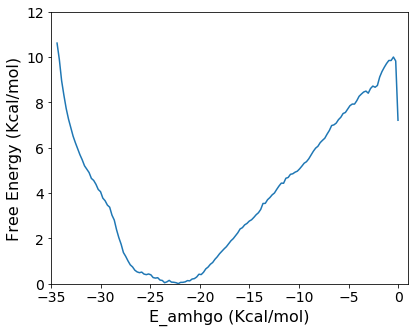

In [9]:
a=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')
a.columns = ['E', 'r', 'pmf','prob']
print(len(a))


tmp=0
p=0
x=[]
P=[]
for row in a.itertuples():
    if row.E != tmp: 
        x.append(tmp)
        P.append(p)
        p=0
    p += np.exp((row.pmf+2*0.001987*300*np.log(row.r))/(-0.001987*300))
    tmp = row.E
    
x.append(tmp)
P.append(p)

print(len(x))
print(len(P))

plt.figure(figsize=(6.4,5))
tmp_min = min(-0.001987*300*np.log(P[1:]))
plt.plot(x[1:],-0.001987*300*np.log(P[1:])-tmp_min)

plt.xlabel('E_amhgo (Kcal/mol)', fontsize=16)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-35,1)
plt.ylim(0,12)
plt.savefig('pmf-E.png')

In [2]:
b=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')
b.columns = ['e', 'r', 'pmf','prob']
z = b.pmf+2*0.001987*300*np.log(b.r)
pmf_2d = z.values.reshape(150,60)

q=np.exp(pmf_2d/(-0.001987*300))
p_2d=q/np.sum(q)

(150, 60)


/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/xg23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


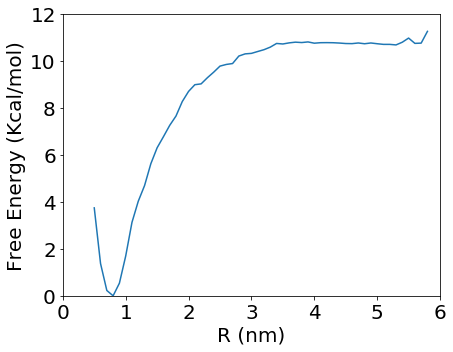

In [6]:
P=np.sum(p_2d,0)
print(np.shape(p_2d))
np.shape(P)

plt.figure(figsize=(6.4,5))
tmp_min = min(-0.001987*300*np.log(P[:]))
plt.plot(np.linspace(0, 6, num=61)[:-1], -0.001987*300*np.log(P[:])-tmp_min)

plt.xlabel('R (nm)', fontsize=20)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,6)
plt.ylim(0,12)
plt.tight_layout()
plt.savefig('pmf-R.png')

In [26]:
P=np.sum(np.transpose(p_2d),0)
print(np.shape(p_2d))
np.shape(P)

(150, 60)


(150,)

(0, 12)

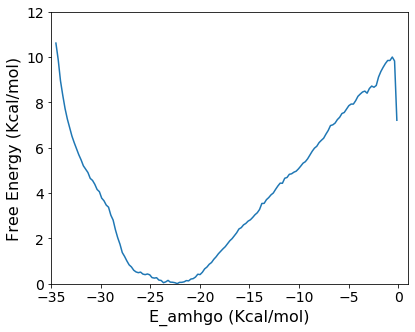

In [27]:
plt.figure(figsize=(6.4,5))
tmp_min = min(-0.001987*300*np.log(P[:]))
plt.plot(np.linspace(-34.5,0.1, num=151)[:-1], -0.001987*300*np.log(P[:])-tmp_min)

plt.xlabel('E_amhgo (Kcal/mol)', fontsize=16)
plt.ylabel('Free Energy (Kcal/mol)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-35,1)
plt.ylim(0,12)
#plt.savefig('pmf-R.png')

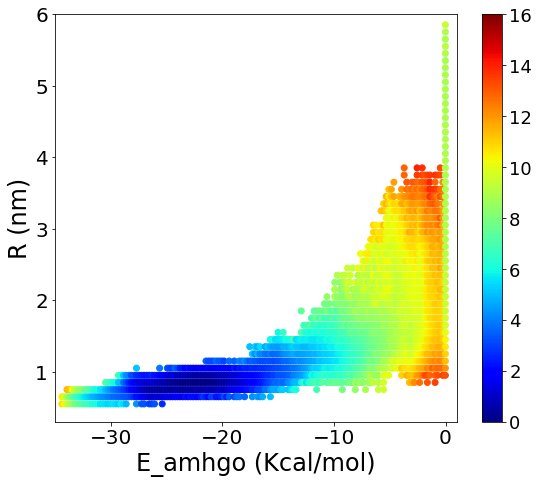

In [7]:
a=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')

a.columns = ['beta', 'alpha', 'pmf','prob']
b=a[a.pmf<9999]


plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf+2*0.001987*300*np.log(b.alpha))
#CS = ax.contourf([b.beta, b.alpha], b.pmf+2*0.001987*300*np.log(b.alpha)-minp, levels, cmap=plt.get_cmap('jet'))
CS = ax.scatter(b.beta, b.alpha, c=b.pmf+2*0.001987*300*np.log(b.alpha)-minp, cmap=plt.get_cmap('jet'), vmin=0, vmax=16)
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-35,1)
plt.ylim(0.3,6)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("R (nm)", fontsize=24)
plt.savefig("scatter.png")

In [ ]:
b=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')

b.columns = ['beta', 'alpha', 'pmf','prob']
#b=a[a.pmf<9999]

#b.pmf[b.pmf>9999] = np.max(a.pmf) + 1
#levels=np.arange(0.0, np.max(a.pmf) + 0.4, 0.4)
#b.pmf[b.pmf>9999] = 20
#b.pmf[b.pmf>20] = 20
#levels=np.arange(-2, 20, 0.5)
levels=np.arange(0, 16, 0.5)

plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.min(b.pmf+2*0.001987*300*np.log(b.alpha))
CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.alpha)-minp, levels, cmap=plt.get_cmap('jet'))
#CS = ax.tricontourf(b.beta, b.alpha, b.pmf+2*0.001987*300*np.log(b.beta), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(-35,1)
plt.ylim(0.3,6)
plt.xlabel("E_amhgo (Kcal/mol)", fontsize=24)
plt.ylabel("R (nm)", fontsize=24)
plt.savefig("contour.png")

In [8]:
b=pd.read_csv('2dpmf-3.dat', header=None, delim_whitespace=True, comment='#')
b.columns = ['e', 'r', 'pmf','prob']
z = b.pmf+2*0.001987*300*np.log(b.r)
pmf_2d = z.values.reshape(150,60)

q=np.exp(pmf_2d/(-0.001987*300))
p_2d=q/np.sum(q)

In [11]:
x=[]
y=[]
z=[]
binx=150
biny=60
binz=100
for i in range(33):
    at=np.loadtxt(str(i)+"-wham-3dpc.dat")
    a=np.transpose(at)
    x.append(a[-3])
    y.append(a[-2])
    z.append(a[-1])

for i in range(33,36):
    for j in range(9):
        at=np.loadtxt(str(i)+"-"+str(j)+"-wham-3dpc.dat")
        a=np.transpose(at)
        x.append(a[-3])
        y.append(a[-2])
        z.append(a[-1])

X=np.concatenate(x)
Y=np.concatenate(y)
Z=np.concatenate(z)

t=scipy.stats.binned_statistic_dd([X, Y, Z], np.zeros(len(X)), statistic="count",  bins=[np.linspace(-34.5,0.1, num=binx+1), np.linspace(0, 6, num=biny+1), np.linspace(-20,32, num=binz+1)])

count=t.statistic
p=np.zeros((binx,biny,binz))

for i in range(binx):
    for j in range(biny):    
        N=sum(count[i,j,:])
        if N>0:
            for k in range(binz):
                p[i][j][k]=p_2d[i][j]*count[i][j][k]/N
            
p_yz=np.zeros((biny,binz))
for i in range(biny):
    for j in range(binz):    
        p_yz[i][j]=sum(p[:,i,j])


fep=np.zeros((biny,binz))
for i in range(biny):
    for j in range(binz):
        if p_yz[i][j]>0:
            fep[i][j]=-0.001987*300*np.log(p_yz[i][j])
        else:
            fep[i][j]=np.nan

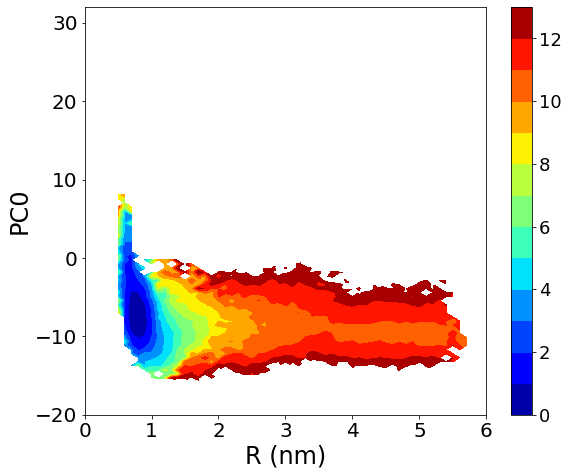

In [12]:
plt.figure(figsize=(9,7.5))
ax = plt.gca()
minp=np.nanmin(fep)
levels=np.arange(0, 14, 1)

CS = ax.contourf(np.linspace(0, 6, num=biny+1)[:-1], np.linspace(-20,32, num=binz+1)[:-1], np.transpose(fep-minp), levels, cmap=plt.get_cmap('jet'))
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=18)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,6)
plt.ylim(-20,32)
plt.xlabel("R (nm)", fontsize=24)
plt.ylabel("PC0", fontsize=24)
plt.savefig("pcpmf.png")

In [13]:
a=pd.read_csv("0-wham-3dpc.dat", header=None, delim_whitespace=True, comment='#')
Nfile=0*np.ones(len(a))
a["Nfile"]=Nfile.tolist()

for i in range(1, 33):
    at=pd.read_csv(str(i)+"-wham-3dpc.dat", header=None, delim_whitespace=True, comment='#')
    Nfile=i*np.ones(len(at))
    at["Nfile"]=Nfile.tolist()
    a=a.append(at)

for i in range(33,36):
    for j in range(9):
        at=pd.read_csv(str(i)+"-"+str(j)+"-wham-3dpc.dat", header=None, delim_whitespace=True, comment='#')
        Nfile=(i+0.1*j)*np.ones(len(at))
        at["Nfile"]=Nfile.tolist()
        a=a.append(at)
        
len(a)

84000

In [14]:
a.columns = ['step','E', 'r', 'pc','Nfile']
a

,step,E,r,pc,Nfile
0,200,-33.809,0.576,-1.991,0.0
1,201,-32.394,0.656,-1.060,0.0
2,202,-33.304,0.652,-0.804,0.0
3,203,-32.800,0.609,-1.031,0.0
4,204,-33.754,0.687,-1.379,0.0
...,...,...,...,...,...
1395,1595,-0.000,4.647,-10.909,35.8
1396,1596,-0.000,4.699,-9.168,35.8
1397,1597,-0.000,4.801,-9.717,35.8
1398,1598,-0.000,5.185,-8.904,35.8


(array([ 0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

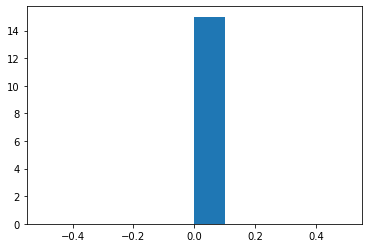

In [30]:
R=5
PC=-10

dr=0.05
dpc=0.05
tmp=a[(a.r<R+dr)&(a.r>R-dr)&(a.pc<PC+dpc)&(a.pc>PC-dpc)]
plt.hist(tmp.E)

In [31]:
E=-0

de=0.1
tmp[(tmp.E<E+de)&(tmp.E>E-de)]

,step,E,r,pc,Nfile
147,347,-0.0,5.049,-9.965,33.8
197,397,-0.0,5.042,-10.009,33.8
786,986,-0.0,4.995,-10.029,33.8
1178,1378,-0.0,5.026,-9.997,33.8
1208,1408,-0.0,5.018,-10.024,33.8
252,452,-0.0,4.995,-9.968,34.8
257,457,-0.0,5.001,-9.966,34.8
504,704,-0.0,5.016,-10.017,34.8
547,747,-0.0,5.007,-10.016,34.8
747,947,-0.0,5.019,-9.952,34.8
